# **JAMBOREE EDUCATION - LINEAR REGRESSION**
<br>

About the Dataset - 
<br>

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
<br>

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## **Column Profiling:**

- Serial No. (Unique row ID)
<br>

- GRE Scores (out of 340)
<br>

- TOEFL Scores (out of 120)
<br>

- University Rating (out of 5)
<br>

- Statement of Purpose and Letter of Recommendation Strength (out of 5). Where a higher values signifies a stronger LOR or SOP
<br>

- Undergraduate GPA (out of 10)
<br>

- Research Experience (either 0 or 1). Where 1 means research experience exists and vice-vera
<br>

- Chance of Admit (ranging from 0 to 1)
<br>

## Problem Statement: 
<br>

Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.

In [58]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score

from sklearn.feature_selection import f_regression

from sklearn.linear_model import Ridge  

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("Jamboree.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- As we can see "Serial no." column does not provid any value
<br>

- We do not want our model learning unnecessary or irrelevant parameters
<br>

- Therefore lets drop this column altogether

In [4]:
df = df.drop(["Serial No."], axis = 1)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 8)

- As we can see our data set has 500 rows and 8 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


- No missing values
<br>

- But categorical columns have not been detected so lets do that after a statistical summary


# Statistical Analysis


In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Converting necessary columns to category type

In [9]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [10]:
df.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

In [11]:
df.duplicated().sum()

0

- **No duplicate values**

In [12]:
df.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


- University Rating column is now recognized as categorical variables
<br>

- SOP column is now recognized as categorical variables
<br>

- LOR column is now recognized as categorical variables
<br>

- Research column is now recognized as categorical variables
<br>


# Pairplot to see linear relationships

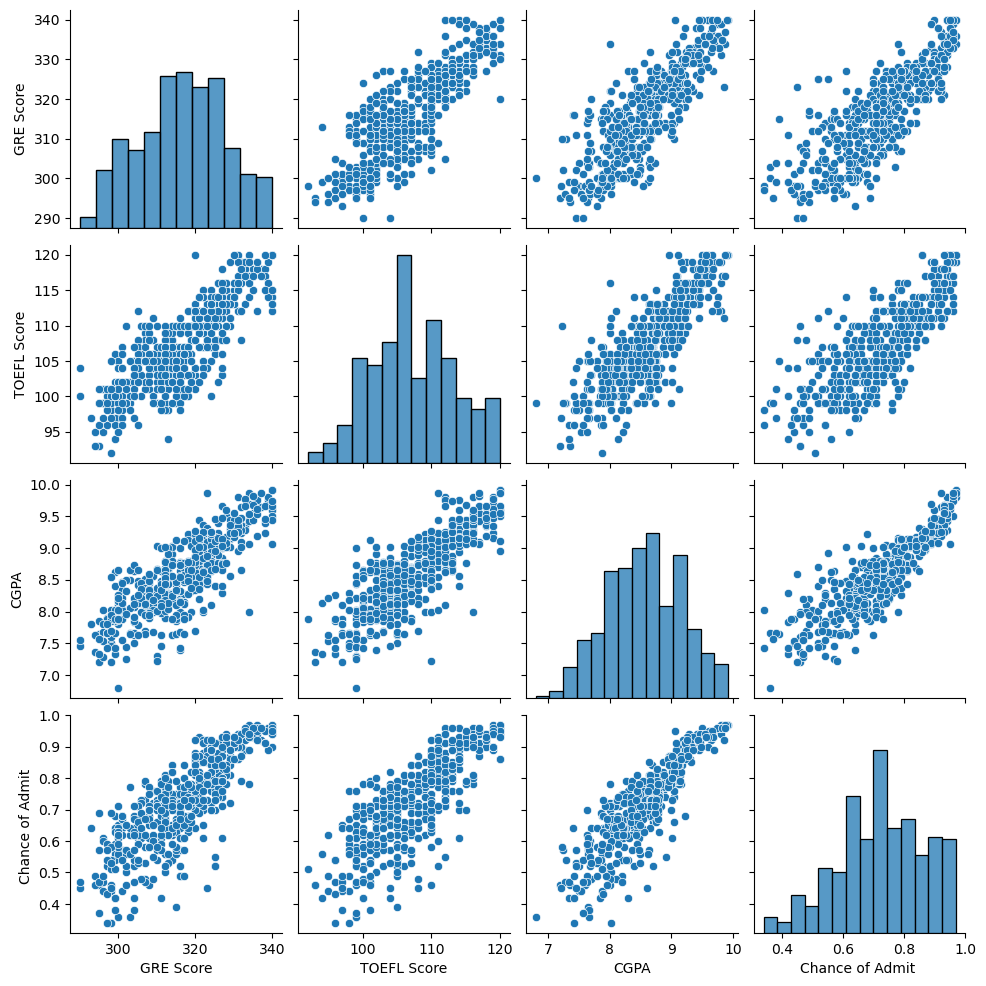

In [13]:
sns.pairplot(df)

- GRE, TOEFL, CGPA all seem to have a linear positive relationship with chance of admit
<br>

- The histograms are nothing but the column compared with itself

## Heatmap to analyse the correlation between features and Chance of Admit



- A heatmap analysis is a visualization technique used to represent data in a matrix format, where values are depicted as colors. It helps reveal patterns, correlations, and distributions within complex datasets. By mapping numerical values to colors, heatmaps provide an intuitive way to identify trends and relationships in the data.

<Axes: >

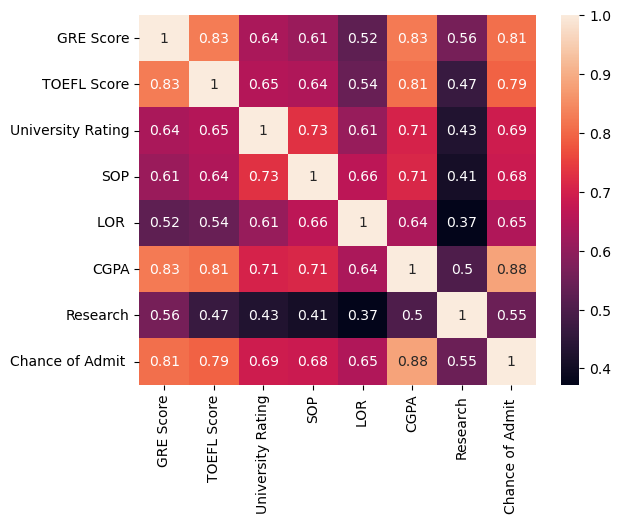

In [14]:
df2 = pd.read_csv("Jamboree.csv")

df2 = df2.drop(["Serial No."], axis=1)

df_corr = df2.corr(numeric_only=True)

sns.heatmap(df_corr, annot=True)

- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
<br>

- Target/Dependent Variable : Chance of Admit (the value we want to predict)
<br>
- from above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with Change of admission.
<br>
- University rating, SOP , LOR and Research have comparatively slightly less correlated than other features.

# Univariate Analysis 

#### Histograms
Histograms are among the most useful EDA techniques for univaraite analysis, and allow you to gain insight into your data, including distribution, central tendency, spread, modality and outliers. 

#### Boxplots 

Boxplots are interesting for representing information about the central tendency, symmetry, skew and outliers, but they can hide some aspects of the data such as multimodality. Boxplots are an excellent EDA technique because they rely on robust statistics like median and IQR. Side-by-Side Boxplots

Representing several boxplots side by side allows easy comparison of the characteristics of several groups of data

### For the 4 numeric columns

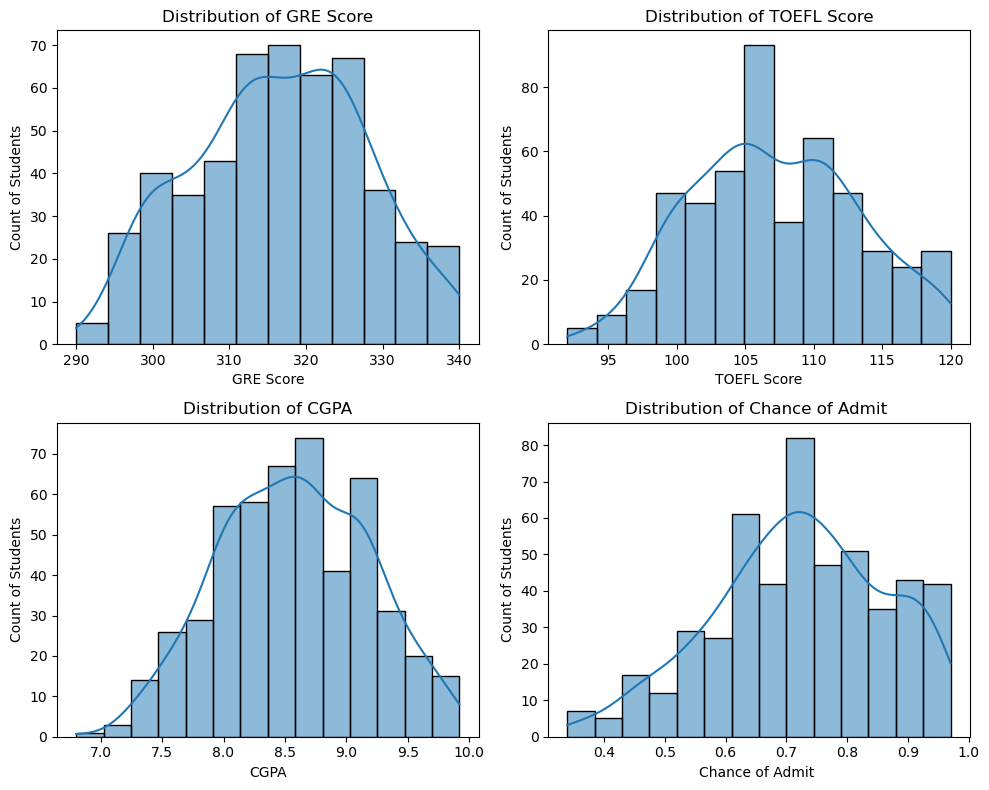

In [15]:
numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show();

We can see the range of all the numerical attributes:

- GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
<br>

- TOEFL scores are between 90 and 120, with maximum students scoring around 105
<br>

- CGPA ranges between 7 and 10, with maximum students scoring around 8.5
<br>

- Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

### For the 4 categorical columns

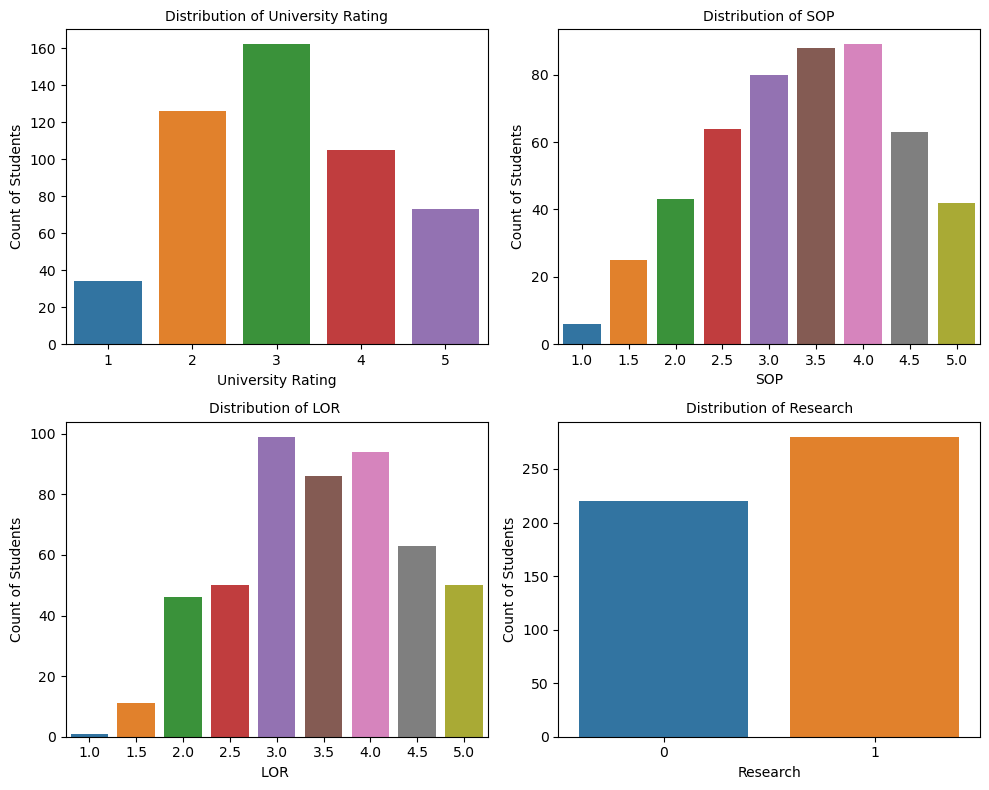

In [16]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

It can be observed that the most frequent value of categorical features is as following:

- University Rating : 3
<br>

- SOP : 3.5 & 4
<br>

- LOR : 3
<br>

- Research : True

# Bi - Variate Analysis

## Categorical features - vs - chances of admission boxplot :

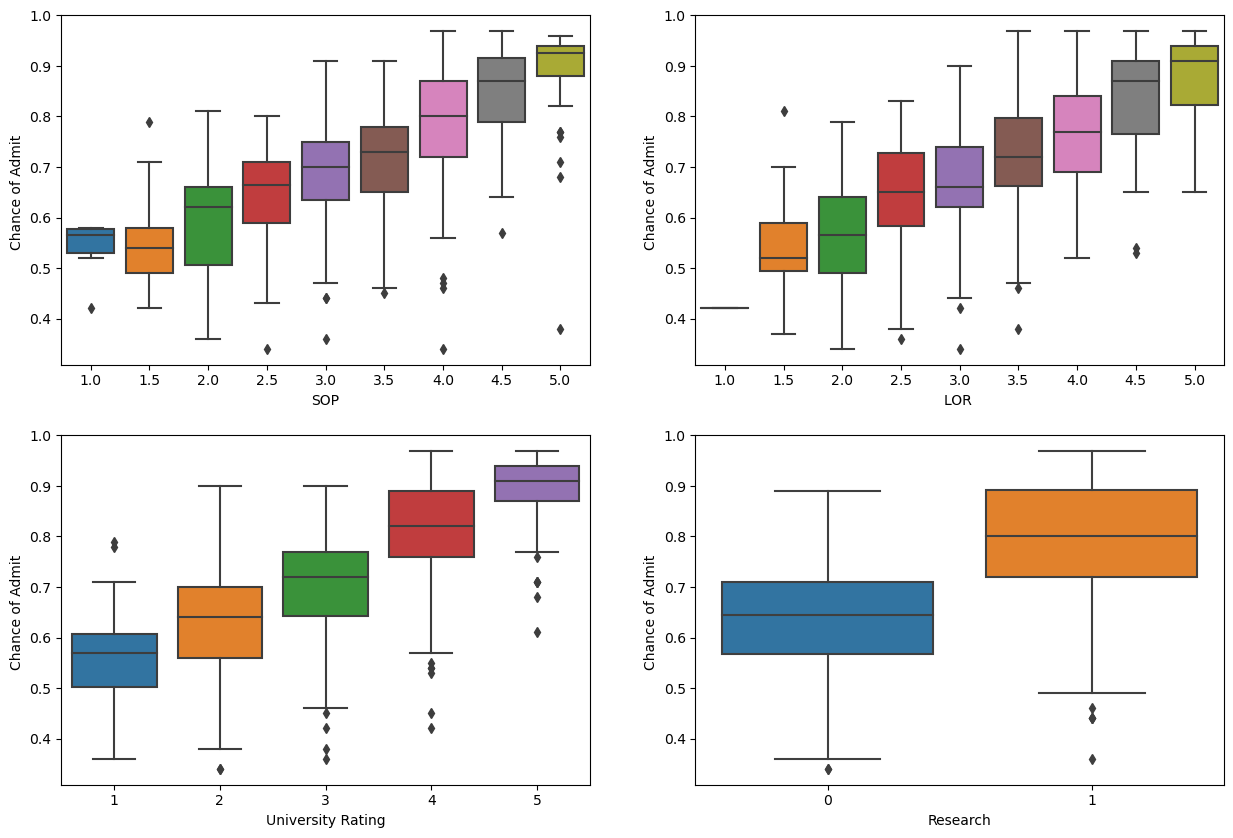

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["Chance of Admit "], x = df["SOP"])
plt.subplot(2,2,2)
sns.boxplot(y = df["Chance of Admit "], x = df["LOR "])
plt.subplot(2,2,3)
sns.boxplot(y = df["Chance of Admit "], x = df["University Rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["Chance of Admit "], x = df["Research"])
plt.show()

- From above plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission 
<br>
- We can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission
<br>

- Student having research has higher chances of Admission , but also we can observe some outliers within that caregory.

## Numerical features - vs - chances of admission jointplot :

GRE Score


<Figure size 300x300 with 0 Axes>

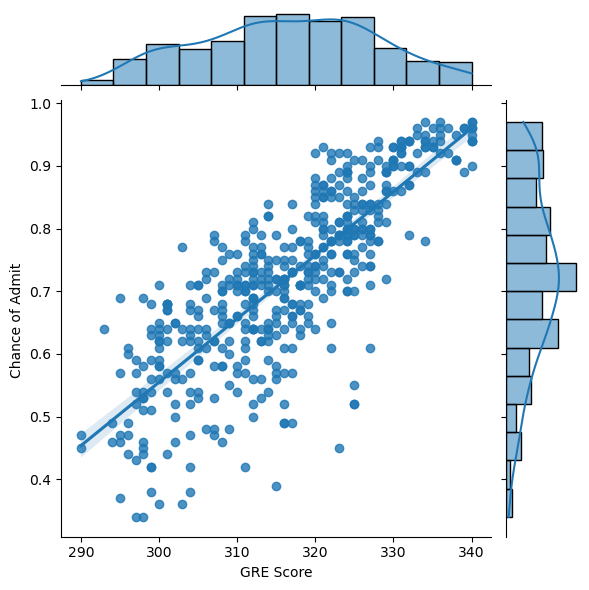

TOEFL Score


<Figure size 300x300 with 0 Axes>

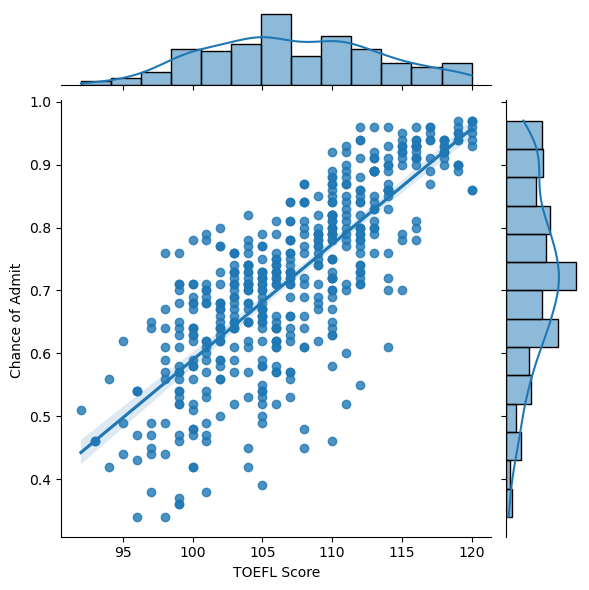

CGPA


<Figure size 300x300 with 0 Axes>

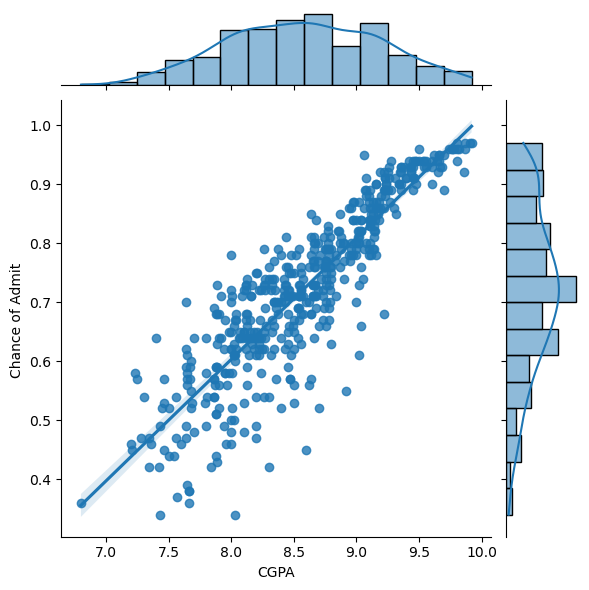

Chance of Admit 


<Figure size 300x300 with 0 Axes>

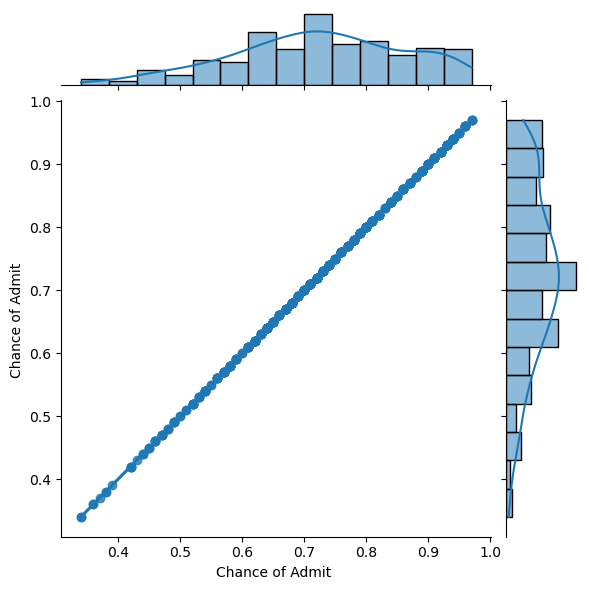

In [18]:
for col in numeric_cols:
    print(col)
    plt.figure(figsize=(3,3))
    sns.jointplot(data=df,x=df[col],y=df["Chance of Admit "],kind="reg")
    plt.show()

- As seen in the pair plot, variables such as GRE Score, TOEFL Score and CGPA have a positive linear relationship with the target variable

# Data Preprocessing

### Missing Values/Outliers/Duplicates Check

#### Checking for missing values


In [19]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There are no missing values in the dataset



 #### Check for outliers in numerical columns



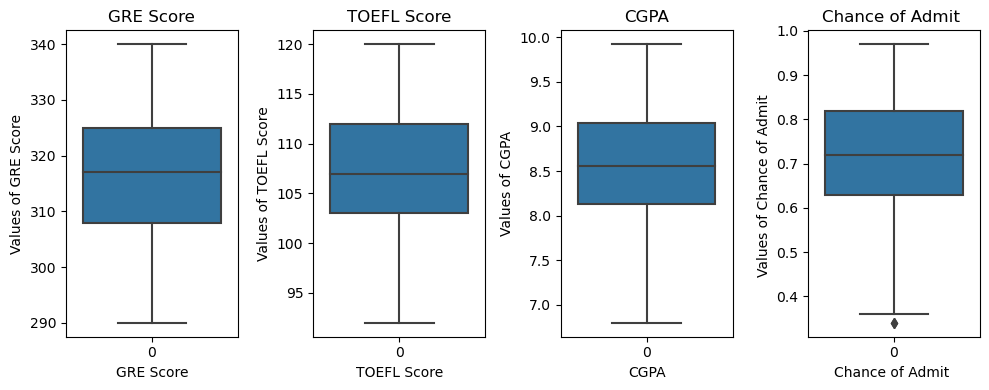

In [20]:
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

- It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)

#### Checking for duplicate rows

In [21]:
df[df.duplicated()].shape

(0, 8)

- There are no duplicate rows

#### Creating Train-Test split

In [22]:
x = df.drop(["Chance of Admit "], axis = 1)

y = df["Chance of Admit "].values.reshape(-1,1)

- We now have our independent variables in the DataFrame x
<br>

- We now have our dependent variables in the DataFrame y

In [23]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


- Dependent variable removed

####  Making the independent variables standardised

In [25]:
standardizer = StandardScaler()   
standardizer.fit(x)
x = standardizer.transform(x) 
x[0:5,:1]

array([[ 1.81923762],
       [ 0.66714832],
       [-0.0418297 ],
       [ 0.48990382],
       [-0.21907421]])

- x dataframe which is our independent variable dataframe is now standardized

#### Splitting the data

In [26]:
x_train , x_test, y_train , y_test = train_test_split(x,y,
                                                     random_state = 1,
                                                      test_size = 0.2 
                                                     )                    

In [27]:
x_train.shape,x_test.shape

((400, 7), (100, 7))

In [28]:
y_train.shape, y_test.shape

((400, 1), (100, 1))

# Training the Linear Regression model

In [29]:
model_lr = LinearRegression()

model_lr.fit(x_train,y_train)

LinearRegression()

- Model trained successfully

### Predicting values for the training and test data

In [30]:
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

### Evaluating the model using multiple loss functions



In [62]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
    
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
    RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")
    
  

 ### Metrics for training data



In [32]:
model_evaluation(y_train, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [33]:
model_evaluation(y_test, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model
<br>

- Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
<br>

- Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
<br>

- R2 Score of 0.82 means that our model captures 82% variance in the data
<br>

- Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [34]:
ws = pd.DataFrame(model_lr.coef_.reshape(1,-1),columns=df.columns[:-1])
ws.T

,0
GRE Score,0.020675
TOEFL Score,0.019284
University Rating,0.007001
SOP,0.002975
LOR,0.013338
CGPA,0.070514
Research,0.009873


- Weights of all the independent variables (Keep in mind we still have to check for VIF)

In [35]:
ic = model_lr.intercept_
ic[0]

0.7228813180778462

- Intercept of our model 

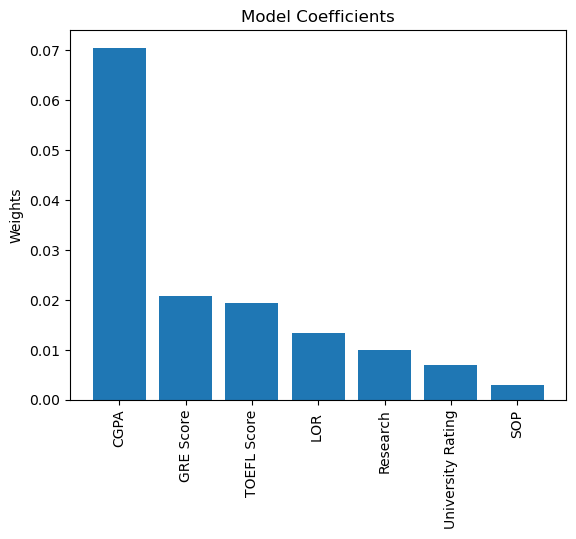

In [36]:
model_weights=list(zip(df.columns, model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

# Testing assumptions of linear regression
- No multicollinearity
<br>

- The mean of residual is nearly zero
<br>

- Linearity of Variables
<br>

- Test of homoscedasticity
<br>

- Normality of residual

## Multicolinearity Check
VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

j represents the jth predictor variable. R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

In [37]:
vifs = []

for i in range(x_train.shape[1]):
    
    vifs.append((variance_inflation_factor(exog = x_train,
                                   exog_idx=i)))
    
pd.DataFrame(list(zip(df.columns,vifs)))

,0,1
0,GRE Score,4.873265
1,TOEFL Score,4.243883
2,University Rating,2.798252
3,SOP,2.920046
4,LOR,2.079334
5,CGPA,4.751389
6,Research,1.508148


- We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

# Mean of residuals

- The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.
<br>


- The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

Mean of residuals : -0.005706590389232237


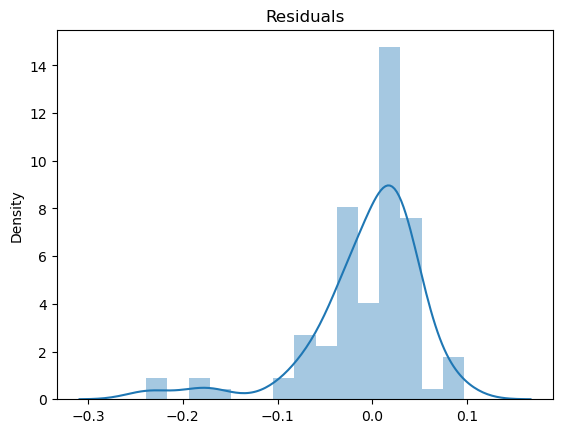

In [38]:
residuals = (y_test - y_pred_test) 
res = residuals.mean()
sns.distplot(residuals)
plt.title("Residuals")
print ("Mean of residuals :" ,res)

- Since the mean of residuals is very close to 0, we can say that the model is unbiased

# Linearity of varibales

- The assumption of linearity requires that the relationship between each independent variable and the dependent variable is linear 
<br>

- This means that a change in the value of an independent variable results in a proportional change in the value of the dependent variable
<br>

- This relationship can be checked by a either a residual vs actual plot or/and a pairplot
<br>

- If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption

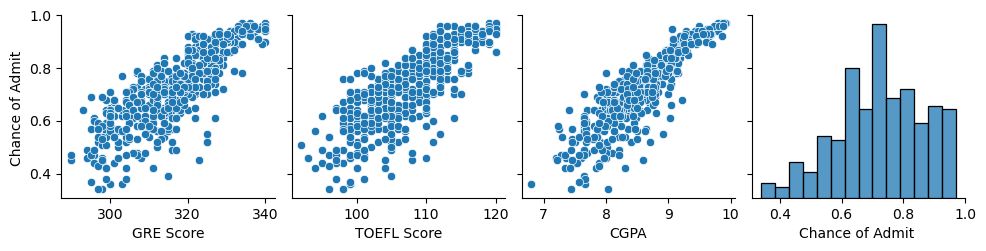

In [39]:
sns.pairplot(df,y_vars = ["Chance of Admit "])
plt.show()

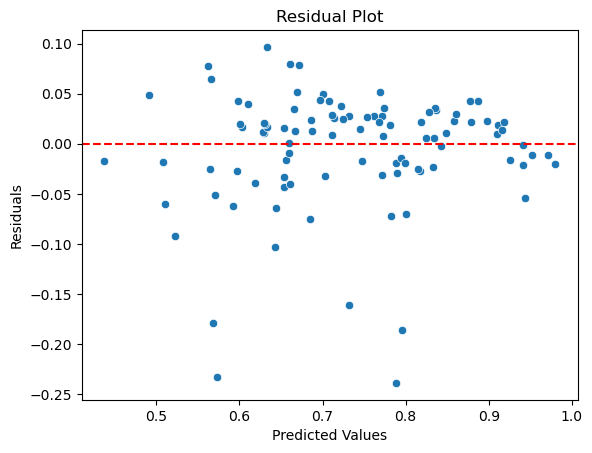

In [40]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();


- Since the residual plot shows no clear pattern or trend in residuals and the pair plot gives a visual representation of a linear relationship we can conclude that linearity of variables exists

# Homoscedasticity

- Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant and should not increase or decrease as the independent variable increases or decreases 
<br>

- In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors
<br>


- When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors

To test for homoscedasticity, there are several graphical and statistical methods that you can use :

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met
<br>

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals
<br>


3. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity

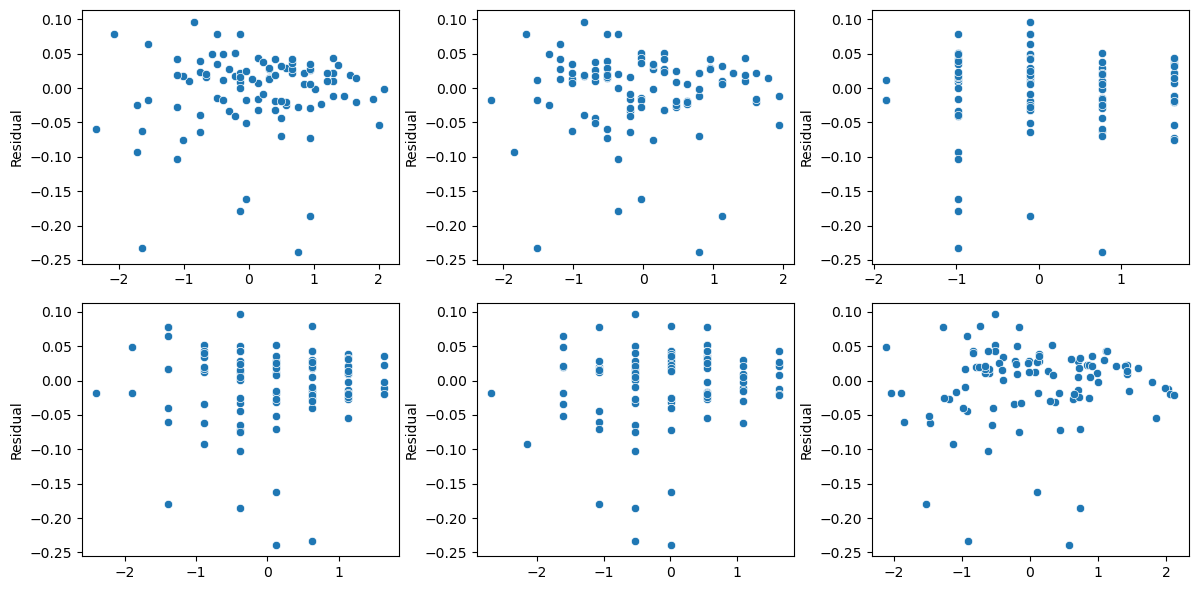

In [41]:
x_test=pd.DataFrame(x_test)
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))

  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

- Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met

# Normality of Residuals


- Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.
<br>

To check for the normality of residuals, you can follow these steps:

1. Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.
<br>

2. Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.
<br>

3. Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.
<br>

4. Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

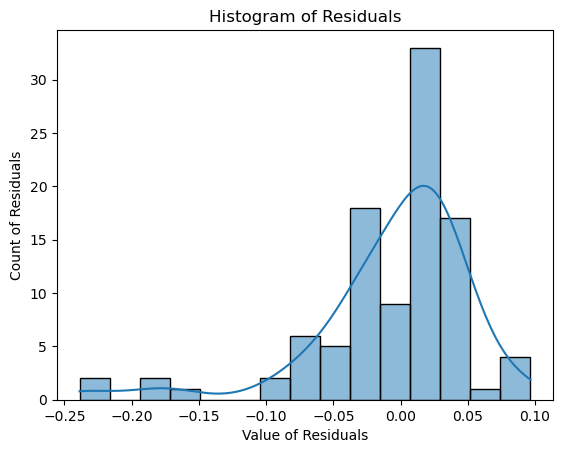

In [42]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

- The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution


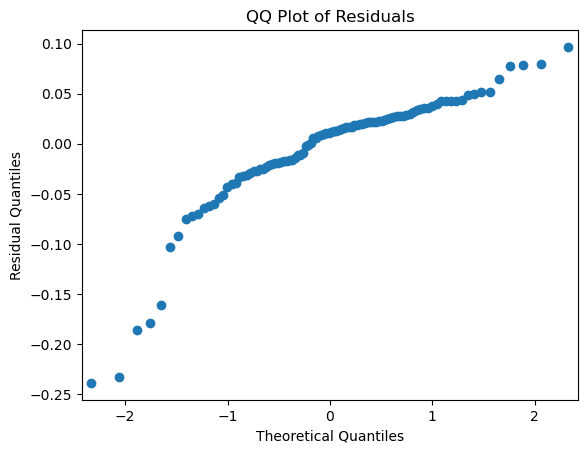

In [43]:
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

- The QQ plot shows that residuals are slightly deviating from the straight diagonal
<br>

- Overall we can conclude the residuals follow a normal distribution

# Lasso and Ridge Regression
<br>

- Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values. 
<br>

- In simple terms the weights associated with each independent variable cannot inflate too much because the same weight in some format (absolute value or squared value) gets added back to the cost function. 
<br>

- Ridge Regression: Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).
<br>

- Lasso Regression: Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.
<br>

The main differences between Ridge and Lasso regression are:

- Ridge regression tends to shrink all coefficient values towards zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
<br>

- Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

# Ridge Regression (L2)

In [65]:
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 50:
    lambdas.append(lambda_)
    RidgeModel = Ridge(lambda_)
    RidgeModel.fit(x_train,y_train)
    trainR2 = RidgeModel.score(x_train,y_train)
    testR2 = RidgeModel.score(x_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)
    lambda_ += 0.01  


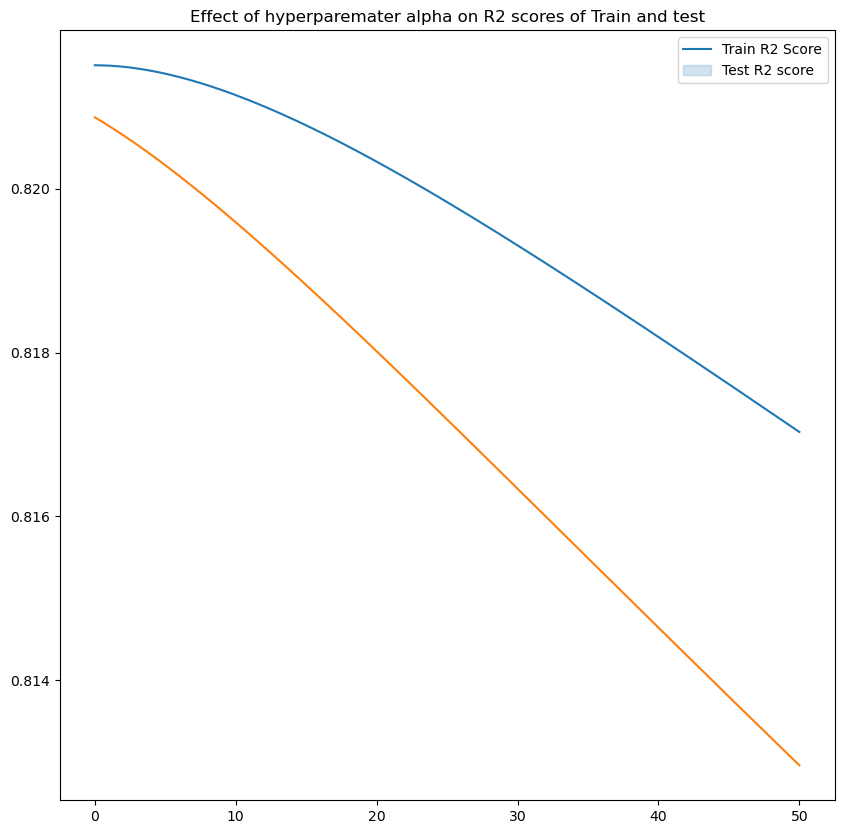

In [66]:
plt.figure(figsize = (10,10))
sns.lineplot(x=lambdas,y=train_R2_score,)
sns.lineplot(x=lambdas, y=test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")


plt.show()

- In the graph, you might observe that initially, as alpha increases, both the training and test R2 scores improve. This is because the model is becoming less overfit to the training data. However, beyond a certain point, increasing alpha too much might cause the model to underfit, resulting in a decrease in both training and test R2 scores.

# Lasso Regression (L1)

In [67]:
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 50:
    lambdas.append(lambda_)
    LassoModel = Lasso(alpha=lambda_)
    LassoModel.fit(x_train , y_train)
    trainR2 = LassoModel.score(x_train,y_train)
    testR2 = LassoModel.score(x_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)
    
    lambda_ += 0.001

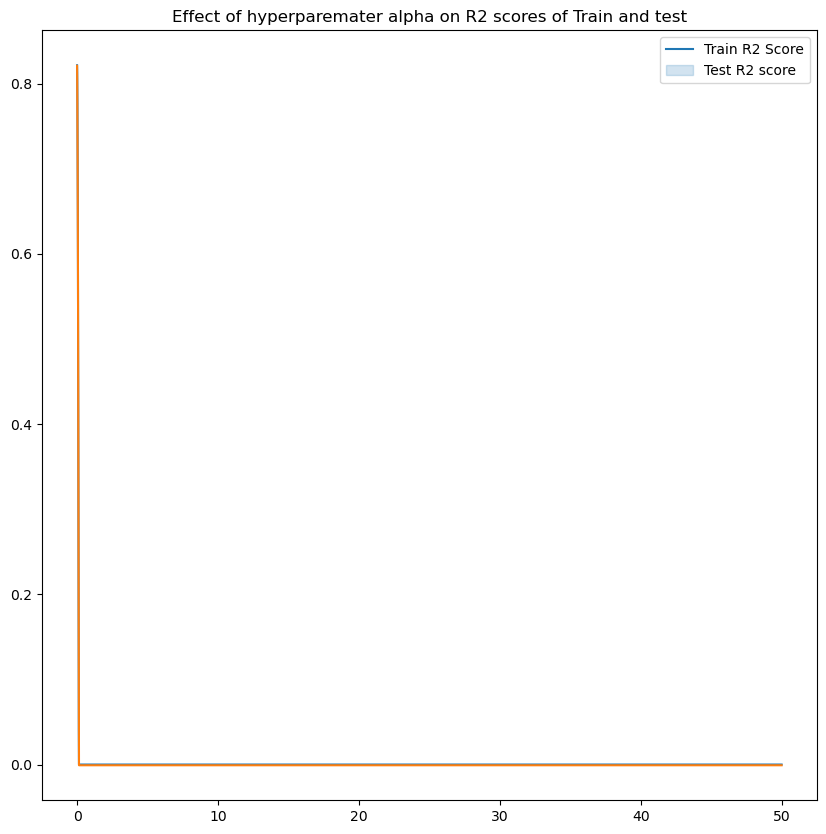

In [68]:
plt.figure(figsize = (10,10))
sns.lineplot(x=lambdas,y=train_R2_score,)
sns.lineplot(x=lambdas,y= test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")


plt.show()

- In Lasso regression a steep descent in the regularization graph indicates that the coefficients are being rapidly shrunk towards zero as the regularization strength increase

# Comparing performance of Ridge and Lasso Regression at alpha = 0.001

In [103]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

y_pred = RidgeModel.predict(x_test)

print("Rigid Regression metrics")
print("\nMSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

y_pred = LassoModel.predict(x_test)

print("\n\nLasso Regression metrics")
print("\nMSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

Rigid Regression metrics

MSE: 0.003611977890527765
RMSE: 0.06009973286569388
MAE : 0.041676414544561495
r2_score: 0.8129574910399376
Adjusted R2 score : 0.8102963171319693


Lasso Regression metrics

MSE: 0.019327605625
RMSE: 0.13902375921043136
MAE : 0.11310749999999999
r2_score: -0.000859904976438175
Adjusted R2 score : -0.015099781673257429


- Clearly Lasso regression is doing a very bad job while rigid is somewhat similar to our linear regression model performance

# Identifying Best Model

## Actual v/s Predicted values for training data

- Training the models to be compared, we already have the linear model trained before so hence will be using that

In [112]:
y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

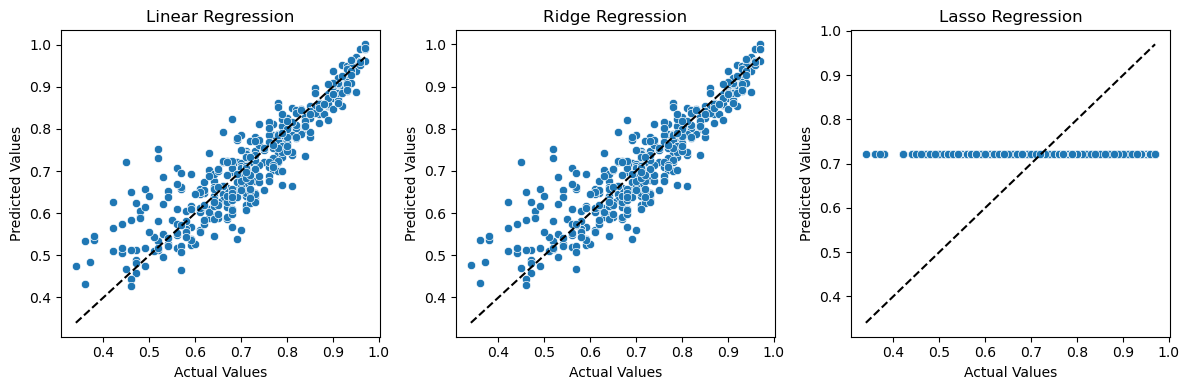

In [117]:
actual_values = y_train.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1
plt.tight_layout()
plt.show();

- We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.
<br>

- This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

# Insights & Recommendations
Insights:


- Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves
<br>

- the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit
<br>

- From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
<br>

- Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results
<br>

- Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established
<br>

### Recommendations:

- Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction
<br>

- Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables